In [1]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pachner_traversal.utils import compute_rhat, data_path, set_style

set_style()

In [90]:
folder = "variance_edge_degree"
save_name = 'sim_annealing_var.pdf'

result_path = data_path / "results" / "sim_annealing" / folder / "20251018_1913"
assert result_path.exists()

In [91]:
df = pd.read_csv(result_path / "progress.csv", index_col=0)

In [92]:
df[df.index.str.startswith("E")].idxmax()['score']

'EMLLLvzPPzwPLMQzAPzAQabddglnjokkqnouqswstuvwzyzBCDCDgagbaaagacvaggaccavgfbcafcoaaco'

In [93]:
prev_iso = None

changes = 0

for next_iso in df.index:
    if prev_iso != next_iso:
        changes += 1
    prev_iso = next_iso

In [94]:
changes / len(df)

0.1944

In [95]:
score_df = pd.read_csv(result_path / "scores.csv", index_col=0)
best_iso = score_df[score_df.index.str.startswith("E")].idxmax()['score']
score_df.loc[best_iso]

score    522.930281
Name: EMLLLvzPPzwPLMQzAPzAQabddglnjokkqnouqswstuvwzyzBCDCDgagbaaagacvaggaccavgfbcafcoaaco, dtype: float64

In [96]:
betas_df = pd.read_csv(result_path / "betas.csv")

In [99]:
tet_map = {
    l: i for i, l in enumerate("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ")
}

In [100]:
def get_scores_df(result_path):
    isos_df = pd.read_csv(result_path / "isos.csv")
    scores_df = pd.read_csv(result_path / "scores.csv", index_col=0)

    scores_series = scores_df['score']
    scores_map = scores_series.to_dict()

    chain_scores_df = isos_df.apply(lambda x: x.map(scores_map), axis=1)
    return chain_scores_df

In [101]:
chain_scores_df = get_scores_df(result_path)

In [102]:
df['score'][df.index.str.startswith("E")].max()

np.float64(522.9302809573362)

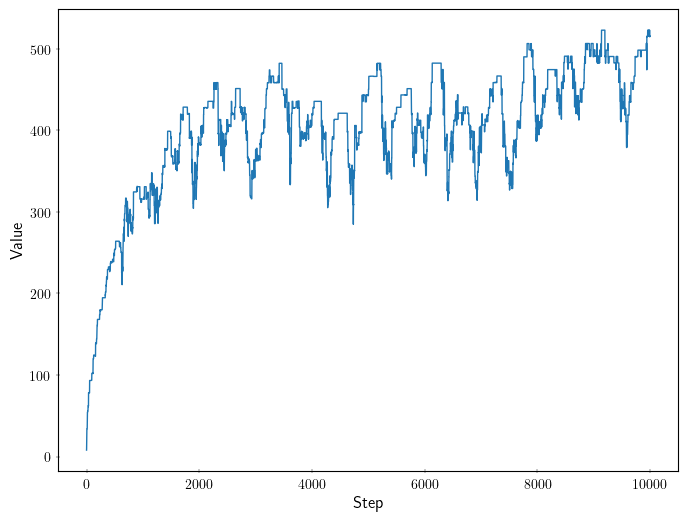

In [103]:
fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(chain_scores_df.iloc[:, chain_scores_df.max().argmax()])
ax.plot(df['score'].values)

plt.xlabel("Step")
plt.ylabel("Value")
plt.savefig(data_path.parent / 'thesis' / 'figures' / save_name, bbox_inches="tight")
plt.show()